In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Top Fitness Activities in Singapore:
      country                           category  interest
34  Singapore   gym workout: (3/16/18 - 3/16/23)        39
33  Singapore  home workout: (3/16/18 - 3/16/23)        37
35  Singapore      home gym: (3/16/18 - 3/16/23)        24


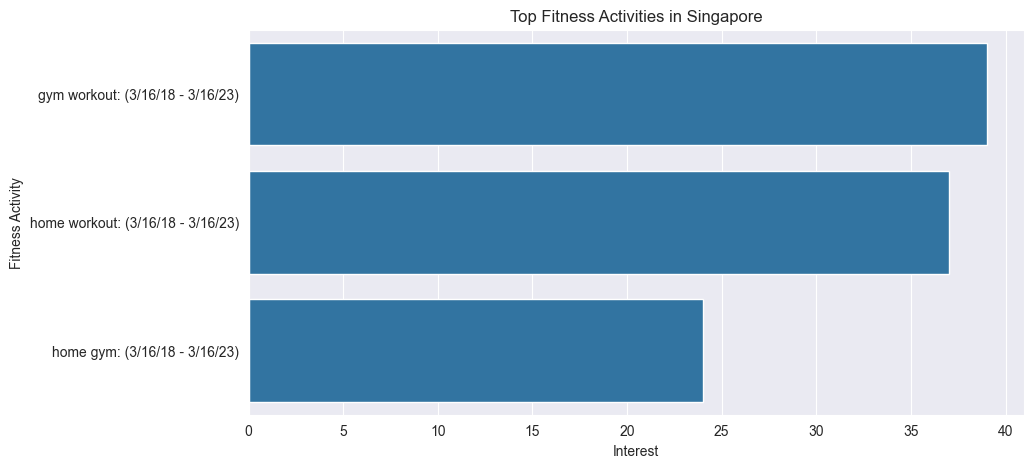

Fitness Preferences Across Regions:
category     gym workout: (3/16/18 - 3/16/23)  home gym: (3/16/18 - 3/16/23)  \
country                                                                        
Indonesia                                  33                             27   
Malaysia                                   38                             15   
Philippines                                38                             10   
Singapore                                  39                             24   
Thailand                                   26                             33   
Vietnam                                    31                             33   

category     home workout: (3/16/18 - 3/16/23)  
country                                         
Indonesia                                   40  
Malaysia                                    47  
Philippines                                 52  
Singapore                                   37  
Thailand                     

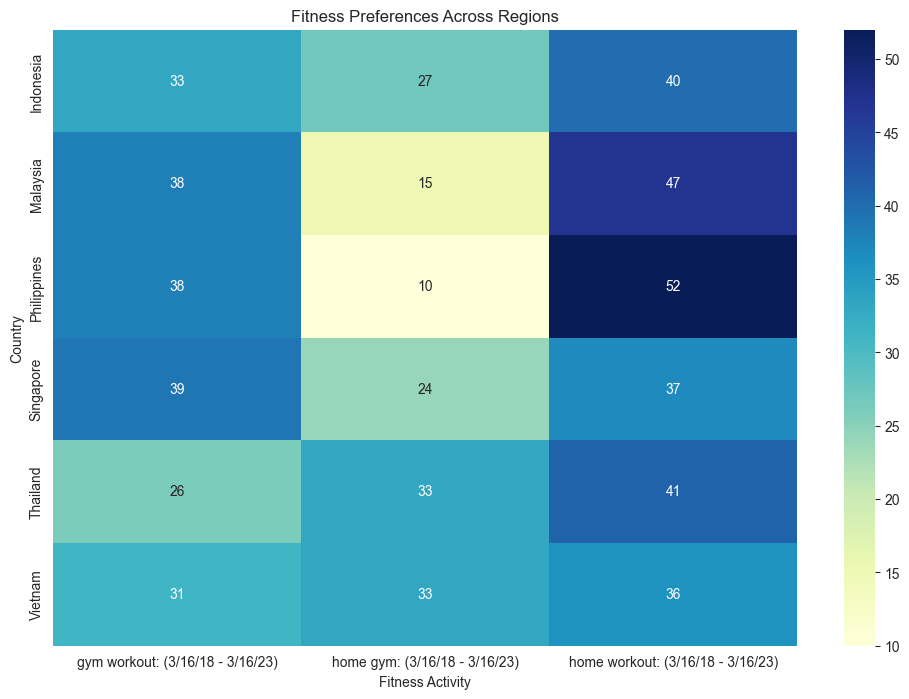

Prevalent Fitness Trends in Nearby Countries:
                            category  interest
0  home workout: (3/16/18 - 3/16/23)        40
1  home workout: (3/16/18 - 3/16/23)        47
2  home workout: (3/16/18 - 3/16/23)        52
3   gym workout: (3/16/18 - 3/16/23)        39
4  home workout: (3/16/18 - 3/16/23)        41
5  home workout: (3/16/18 - 3/16/23)        36


In [21]:
# Load and process the global and geo-specific datasets
workout_global_df = pd.read_csv("data/workout_global_clean.csv")
geo_categories_df = pd.read_csv("data/geo_three_keywords_clean.csv")

# Filter geo_categories_df to focus on Singapore and nearby countries
nearby_countries = ["Singapore", "Malaysia", "Indonesia", "Philippines", "Thailand", "Vietnam", "Myanmar"]
nearby_geo_df = geo_categories_df[geo_categories_df['country'].isin(nearby_countries)]

# 1. Top Fitness Activities in Singapore and Nearby Countries
top_activities_sg = nearby_geo_df[nearby_geo_df['country'] == "Singapore"].sort_values(by='interest', ascending=False)
print("Top Fitness Activities in Singapore:")
print(top_activities_sg)

# Plot top fitness activities in Singapore
plt.figure(figsize=(10, 5))
sns.barplot(data=top_activities_sg, x='interest', y='category')
plt.title('Top Fitness Activities in Singapore')
plt.xlabel('Interest')
plt.ylabel('Fitness Activity')
plt.show()

# 2. Compare Fitness Preferences Across Regions
region_comparison = nearby_geo_df.pivot(index='country', columns='category', values='interest').fillna(0)
print("Fitness Preferences Across Regions:")
print(region_comparison)

# Plot fitness preferences across regions
plt.figure(figsize=(12, 8))
sns.heatmap(region_comparison, annot=True, cmap="YlGnBu")
plt.title('Fitness Preferences Across Regions')
plt.xlabel('Fitness Activity')
plt.ylabel('Country')
plt.show()

# 3. Identify Prevalent Trends in Certain Regions
# For each country, find the activity with the highest interest
prevalent_trends = nearby_geo_df.groupby('country').apply(lambda x: x.loc[x['interest'].idxmax()], include_groups=False).reset_index(drop=True)
print("Prevalent Fitness Trends in Nearby Countries:")
print(prevalent_trends)